created 5/11/16 


generates magnitude frames for tracking

In [5]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import glob
%matplotlib inline

In [32]:
ls_paths = glob.glob('jkdf/*')
len(ls_paths)

1762

In [33]:
ls_gray = map(lambda x: rgb2gray(imread(x)), ls_paths)
len(ls_gray)

1762

In [34]:
ls_flow = []

for i in range(1, len(ls_paths)):
    curr = ls_gray[i]
    prev = ls_gray[i - 1]
    flow = cv2.calcOpticalFlowFarneback(prev, curr, flow=None, pyr_scale=.5, levels=3, winsize=9, iterations=1, poly_n=3, poly_sigma=1.1, flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
    ls_flow.append(flow)

In [35]:
ls_mag_ang = map(lambda x: cv2.cartToPolar(x[...,0], x[...,1]), ls_flow)

In [36]:
ls_mag = map(lambda x: x[0], ls_mag_ang)
ls_ang = map(lambda x: x[1], ls_mag_ang)

In [37]:
ls_mag_normed = map(lambda x: cv2.normalize(x, None, 0, 255, cv2.NORM_MINMAX).astype('uint8'), ls_mag)

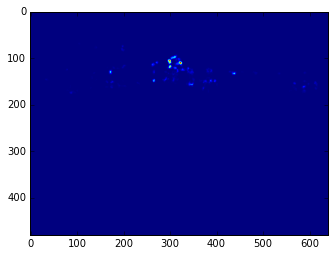

In [38]:
plt.imshow(ls_mag_normed[0])

In [40]:
for i in range(len(ls_mag_normed)):
    
    new_name = "mag/frame%05d.jpg" % i
    cv2.imwrite(new_name, ls_mag_normed[i])